# Variables and Memory


## 1. The Process Memory Model

![1 - ND213 C03 L02 01.1 The Process Memory Model HS.mp4](attachment:1 - ND213 C03 L02 01.1 The Process Memory Model HS.mp4)

### The Process Memory Model
As we have seen in the previous lesson, each program is assigned its own virtual memory by the operating system. This address space is arranged in a linear fashion with one block of data being stored at each address. It is also divided into several distinct areas as illustrated by the figure below:

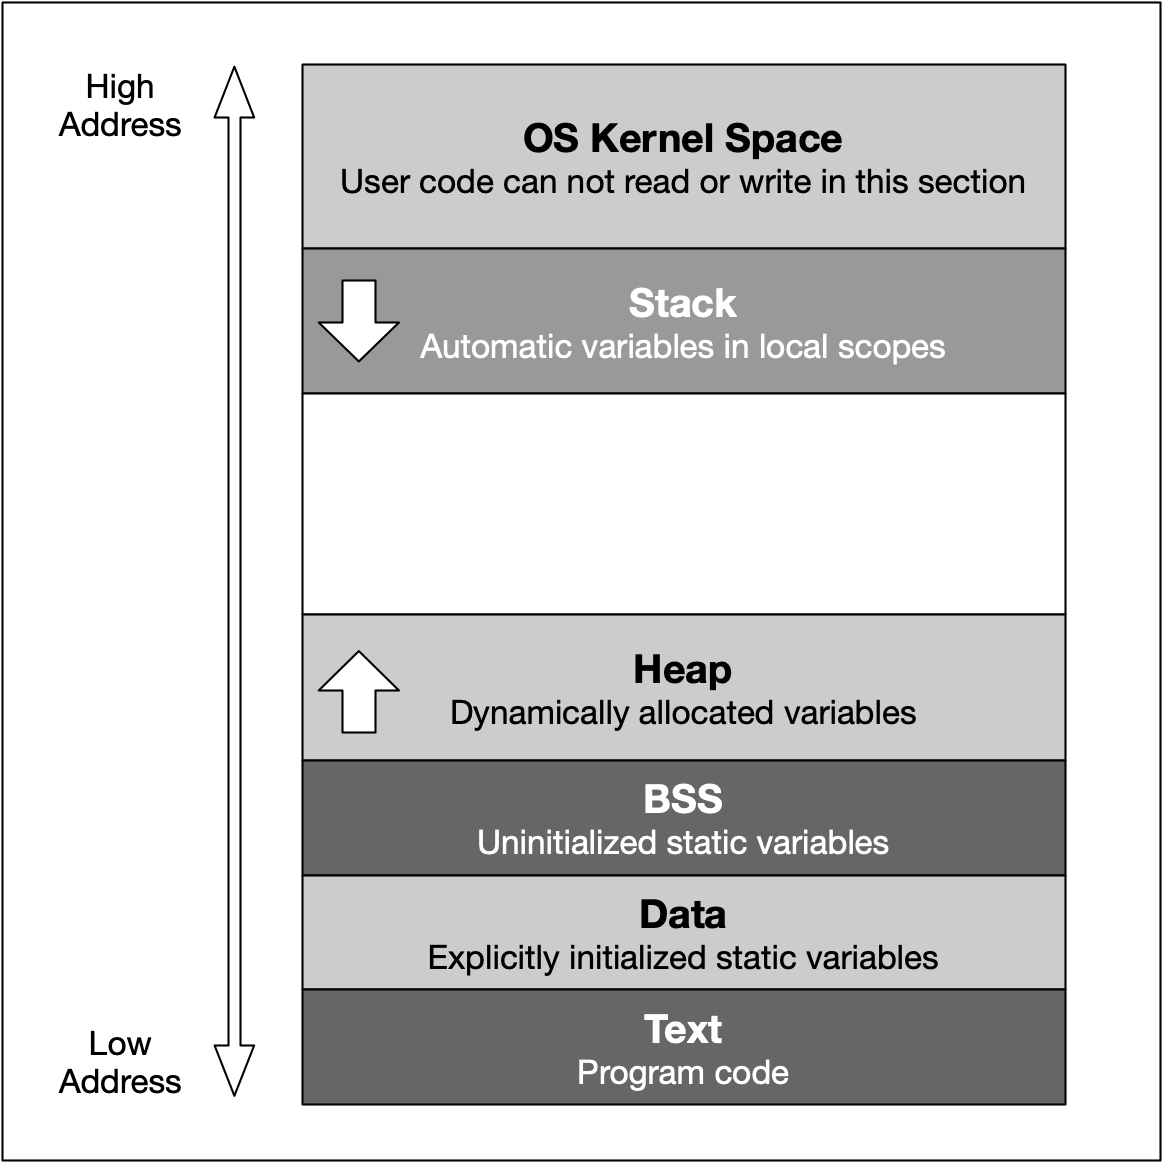

The last address `0cFFFFFFFF` converts to the decimal `4.294.967.295`, which is the total amount of memory blocks that can theoretically addressed in a 32 bit operating system - hence the well-known limit of 4GB of memory. On a 64 bit system, the available space is significantly (!) larger. Also, the addresses are stored with 8 bytes instead of 4 bytes.

From a programming perspective though, we are not able to use the entire address space. Instead, the blocks "OS Kernel Space" and "Text" are reserved for the operating system. In kernel space, only the most trusted code is executed - it is fully maintained by the operating system and serves as an interface between the user code and the system kernel. In this course, we will not be directly concerned with this part of memory. The section called 'text' holds the program code generated by the compiler and linker. As with the kernel space, we will not be using this block directly in this course. Let us now take a look at the remaining blocks, starting from the top:

1. The **stack** is a contiguous memory block with a fixed maximum size. If a program exceeds this size, it will crash. The stack is used for storing automatically allocated variables such as local variables or function parameters. If there are multiple threads in a program, then each thread has its own stack memory. New memory on the stack is allocated when the path of execution enters a scope and freed again once the scope is left. It is important to know that the stack is managed "automatically" by the compiler, which means we do not have to concern ourselves with allocation and deallocation.

2. The **heap** (also called "free store" in C++) is where data with dynamic storage lives. It is shared among multiple threads in a program, which means that memory management for the heap needs to take concurrency into account. This makes memory allocations in the heap more complicated than stack allocations. In general, managing memory on the heap is more (computationally) expensive for the operating system, which makes it slower than stack memory. Contrary to the stack, the heap is not managed automatically by the system, but by the programmer. If memory is allocated on the heap, it is the programmer’s responsibility to free it again when it is no longer needed. If the programmer manages the heap poorly or not at all, there will be trouble.

3. The **BSS** (Block Started by Symbol) segment is used in many compilers and linkers for a segment that contains global and static variables that are initialized with zero values. This memory area is suitable, for example, for arrays that are not initialized with predefined values.

4. The **Data** segment serves the same purpose as the BSS segment with the major difference being that variables in the Data segment have been initialized with a value other than zero. Memory for variables in the Data segment (and in BSS) is allocated once when a program is run and persists throughout its lifetime.

### Memory Allocation in C++
Now that we have an understanding of the available process memory, let us take a look at memory allocation in C++.

Not every variable in a program has a permanently assigned area of memory. The term allocate refers to the process of assigning an area of memory to a variable to store its value. A variable is deallocated when the system reclaims the memory from the variable, so it no longer has an area to store its value.

Generally, three basic types of memory allocation are supported:

1. **Static memory allocation** is performed for static and global variables, which are stored in the BSS and Data segment. Memory for these types of variables is allocated once when your program is run and persists throughout the life of your program.

2. **Automatic memory allocation** is performed for function parameters as well as local variables, which are stored on the stack. Memory for these types of variables is allocated when the path of execution enters a scope and freed again once the scope is left.

3. **Dynamic memory allocation** is a possibility for programs to request memory from the operating system at runtime when needed. This is the major difference to automatic and static allocation, where the size of the variable must be known at compile time. Dynamic memory allocation is not performed on the limited stack but on the heap and is thus (almost) only limited by the size of the address space.

From a programmer’s perspective, stack and heap are the most important areas of program memory. Hence, in the following lessons, let us look at these two in turn.

### Outro
![2 - ND213 C03 L02 01.2 The Process Memory Model HS.mp4](attachment:2 - ND213 C03 L02 01.2 The Process Memory Model HS.mp4)

## 2. Automatic Memory Allocation (The Stack)

![3 - ND213 C03 L02 02.1 Automatic Memory Allocation (The Stack) HS.mp4](attachment:3 - ND213 C03 L02 02.1 Automatic Memory Allocation (The Stack) HS.mp4)

### Properties of Stack Memory
In the available literature on C++, the terms stack and heap are used regularly, even though this is not formally correct: C++ has the free space, storage classes and the storage duration of objects. However, since stack and heap are widely used in the C++ community, we will also use it throughout this course. Should you come across the above-mentioned terms in a book or tutorial on the subject, you now know that they refer to the same concepts as stack and heap do.

As mentioned in the last section, the stack is the place in virtual memory where the local variables reside, including arguments to functions. Each time a function is called, the stack grows (from top to bottom) and each time a function returns, the stack contracts. When using multiple threads (as in concurrent programming), it is important to know that each thread has its own stack memory - which can be considered thread-safe.

In the following, a short list of key properties of the stack is listed:

1. The stack is a **contiguous block of memory**. It will not become fragmented (as opposed to the heap) and it has a fixed maximum size.
2. When the **maximum size of the stack** memory is exceeded, a program will crash.
3. Allocating and deallocating **memory is fast** on the stack. It only involves moving the stack pointer to a new position.

The following diagram shows the stack memory during a function call:

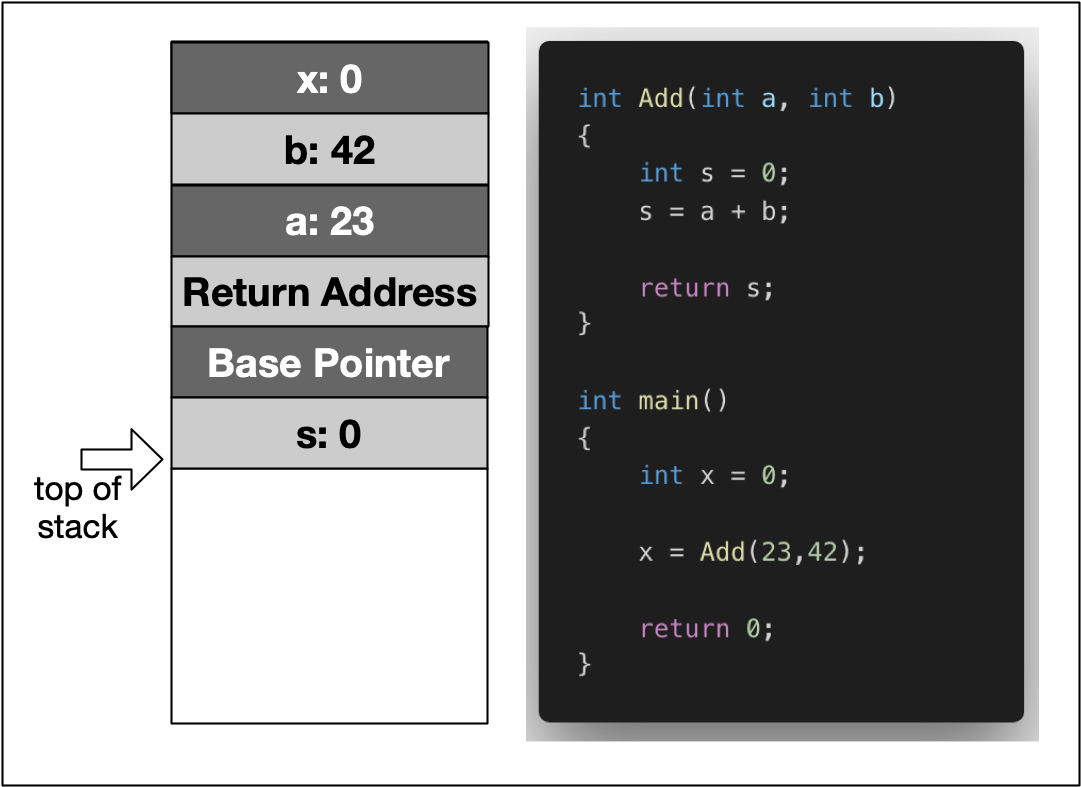

In the example, the variable `x` is created on the stack within the scope of main. Then, a stack frame which represents the function `Add` and its variables is pushed to the stack, moving the stack pointer further downwards. It can be seen that this includes the local variables `a` and `b`, as well as the return address, a base pointer and finally the return value `s`.

In the following, let us dig a little more deeply and conduct some experiments with variables on the stack.

### Stack Growth and Contraction
![4 - ND213 C03 L02 02.2 Automatic Memory Allocation (The Stack) SC.mp4](attachment:4 - ND213 C03 L02 02.2 Automatic Memory Allocation (The Stack) SC.mp4)

>> Refer to the workspace

### Outro
![5 - ND213 C03 L02 02.3 Automatic Memory Allocation (The Stack) HS.mp4](attachment:5 - ND213 C03 L02 02.3 Automatic Memory Allocation (The Stack) HS.mp4)
